In [1]:
import pandas as pd
url = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases"
    "/abalone/abalone.data"
)
abalone = pd.read_csv(url, header=None)

In [ ]:
abalone.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
abalone.columns = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]

In [4]:
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
abalone = abalone.drop("Sex",axis=1)

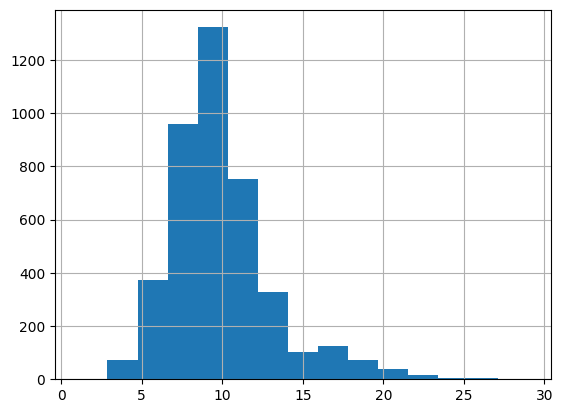

In [7]:
import matplotlib.pyplot as plt 
abalone["Rings"].hist(bins=15)
plt.show()

In [9]:
correlation_matrix = abalone.corr()
correlation_matrix["Rings"]

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [11]:
X = abalone.drop("Rings", axis=1)
X = X.values
y = abalone["Rings"]
y = y.values

X,y

(array([[0.455 , 0.365 , 0.095 , ..., 0.2245, 0.101 , 0.15  ],
        [0.35  , 0.265 , 0.09  , ..., 0.0995, 0.0485, 0.07  ],
        [0.53  , 0.42  , 0.135 , ..., 0.2565, 0.1415, 0.21  ],
        ...,
        [0.6   , 0.475 , 0.205 , ..., 0.5255, 0.2875, 0.308 ],
        [0.625 , 0.485 , 0.15  , ..., 0.531 , 0.261 , 0.296 ],
        [0.71  , 0.555 , 0.195 , ..., 0.9455, 0.3765, 0.495 ]],
       shape=(4177, 7)),
 array([15,  7,  9, ...,  9, 10, 12], shape=(4177,)))

In [13]:
import numpy as np
new_data_point = np.array([
    0.569552,
    0.446407,
    0.154437,
    1.016849,
    0.439051,
    0.222526,
    0.291208,
])


In [ ]:
distances = np.linalg.norm(X - new_data_point, axis=1)
distances

array([0.59739395, 0.9518455 , 0.40573594, ..., 0.20397872, 0.14342627,
       1.10583307], shape=(4177,))

In [22]:
k = 3 
nearest_neighbor_ids = distances.argsort()[:k] # top 3 IDs with minimum distances
nearest_neighbor_ids

array([4045, 1902, 1644])

In [25]:
nearest_neighbor_rings = y[nearest_neighbor_ids]
nearest_neighbor_rings

array([ 9, 11, 10])

In [27]:
prediction = nearest_neighbor_rings.mean()
prediction

np.float64(10.0)

In [30]:
class_neighbors = np.array(["A", "B", "B", "C"])

# Get unique values and their counts
unique, counts = np.unique(class_neighbors, return_counts=True)

# Find the most common class
mode_idx = np.argmax(counts)
mode_class = unique[mode_idx]
mode_count = counts[mode_idx]

print(f"Most common: {mode_class}, count: {mode_count}")  # B, 2

Most common: B, count: 2


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=12345
)

In [35]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)

In [36]:
knn_model.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt 

train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

1.653705966446084

In [38]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test,test_preds)
rmse = sqrt(mse)
rmse

2.375417924000521

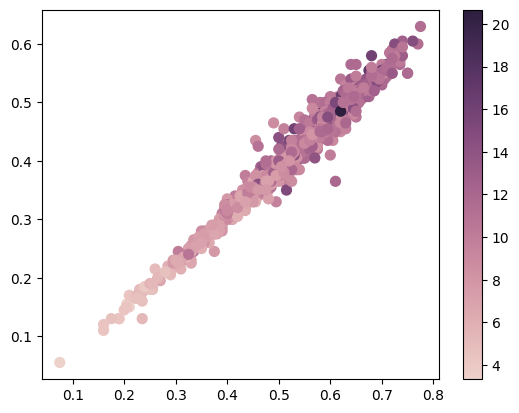

In [41]:
import seaborn as sns 
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:,0], X_test[:, 1], c=test_preds, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

In [45]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)


,estimator,KNeighborsRegressor()
,param_grid,"{'n_neighbors': range(1, 50)}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,25


In [46]:
gridsearch.best_params_

{'n_neighbors': 25}

In [47]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
train_rmse, test_rmse



(2.0731180327543384, 2.1700197339962175)

In [48]:
parameters = {
    "n_neighbors": range(1, 50),
    "weights": ["uniform", "distance"],
}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)
GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

2.1634265584947485

In [ ]:
best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]
bagged_knn = KNeighborsRegressor(
    n_neighbors=best_k, weights=best_weights
)

In [52]:
from sklearn.ensemble import BaggingRegressor
bagging_model = BaggingRegressor(bagged_knn, n_estimators=100)
bagging_model.fit(X_train, y_train)


,estimator,KNeighborsReg...ts='distance')
,n_estimators,100
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,None
,verbose,0


In [53]:
test_preds_grid = bagging_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

2.160556627921557